In [1]:
#Importing Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import random
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import KFold

In [12]:
df1 = pd.read_csv("C:\\Users\\sophi\\VS Code Projects\\LiB-SOH-prediction\\Nasa Battery Data\\Battery 18\\Discharge cycle\\Padded and Resampled\\NoisyInputData.csv")
df2 = pd.read_csv("C:\\Users\\sophi\\VS Code Projects\\LiB-SOH-prediction\\Nasa Battery Data\\Battery 18\\Discharge cycle\\Padded and Resampled\\NoisyInputTempData.csv")


In [13]:
df1.reset_index(inplace=True, drop=True)
df2.reset_index(inplace=True, drop=True)
df = pd.concat([df1,df2],axis=1,join='inner')


In [14]:
trainX = df.drop(columns=["y"])
trainy = df['y'] 
trainX = trainX.to_numpy()
trainy = trainy.to_numpy()
rows, columns = trainX.shape
trainy = trainy.reshape(rows,1)
#Normalizing
scaler = MinMaxScaler()
Xn_train = scaler.fit_transform(trainX)
yn_train = scaler.fit_transform(trainy)


In [15]:
#Reshaping
Xn_train = Xn_train.reshape(rows, 1, columns)

#Using test train split
Alltrain = False
f = open("C:\\Users\\sophi\\VS Code Projects\\LiB-SOH-prediction\\Nasa Battery Data\\Battery 5\\Discharge cycle\\Padded and Resampled\\K_Fold_Data.csv")
writer = csv.writer(f)
k = 1


#random_state options are 0(K=1), 13(K=2), 31(K=3), and 42(K=4)

if k==1:
    rand = 0
elif k == 2:
    rand = 13
elif k ==3:
    rand = 31
else:
    rand = 42

#random_state options are 0, 13, 31, and 42
if not Alltrain:
    X_train, X_test, y_train, y_test = train_test_split(Xn_train,yn_train , test_size=0.10, random_state=rand)
else:
    X_train = Xn_train
    X_test = Xn_train
    y_train = yn_train
    y_test = yn_train


test_rows,foo, test_columns = X_test.shape
train_rows , foo , train_col = X_train.shape

f.close()

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(1,train_col), return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(LSTM(100, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(LSTM(100, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(yn_train.shape[1]))

model.layers[0].trainable = False
model.layers[1].trainable = False
model.layers[2].trainable = False
model.layers[3].trainable = False
model.layers[4].trainable = False
tf.keras.optimizers.Adam(
    learning_rate=0.00001,
    name='Adam')

model.compile(optimizer='Adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 100)            129200    
                                                                 
 dropout_3 (Dropout)         (None, 1, 100)            0         
                                                                 
 dense_3 (Dense)             (None, 1, 100)            10100     
                                                                 
 lstm_4 (LSTM)               (None, 1, 100)            80400     
                                                                 
 dropout_4 (Dropout)         (None, 1, 100)            0         
                                                                 
 dense_4 (Dense)             (None, 1, 100)            10100     
                                                                 
 lstm_5 (LSTM)               (None, 100)              

In [17]:
#fitting the model to X_train and y_train dataset, and 100 epochs and saving it into history
history = model.fit(X_train,y_train, epochs=100,batch_size=5)

Epoch 1/100
48/48 [==============================] - 8s 6ms/step - loss: 0.1284
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0289
Epoch 3/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0139
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0119
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 7/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0105
Epoch 8/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 9/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 10/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0110
Epoch 11/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0100
Epoch 12/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 13/100
48/48 [=================

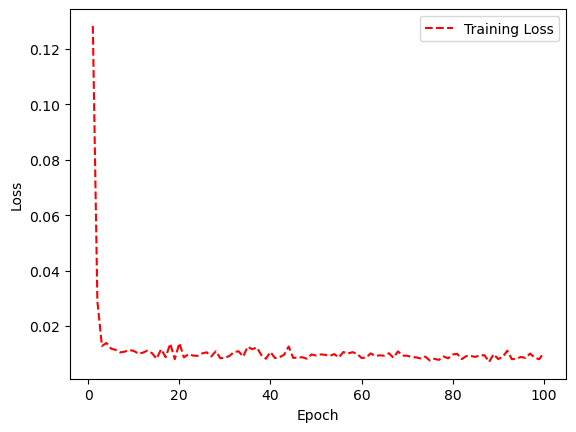

In [18]:
# Using function to get loss history
training_loss = history.history['loss']

# Code for counting the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [19]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(test_rows,1)


1/1 [==============================] - 2s 2s/step


In [20]:
yd_pred = scaler.inverse_transform(y_pred)
yy_test = scaler.inverse_transform(y_test)
y_error = yy_test - yd_pred
df5 = pd.DataFrame(yy_test)
df6 = pd.DataFrame(yd_pred)
df7 = pd.DataFrame(y_error)
DFF = pd.concat([df5,df6,df7],axis=1,join='inner')
DFF.columns = ["Test Data","Prediction Data","Error"]

In [21]:
from sklearn.metrics import mean_absolute_error
print('MAE for y: %.3f' % mean_absolute_error(yy_test, yd_pred))

MAE for y: 0.018


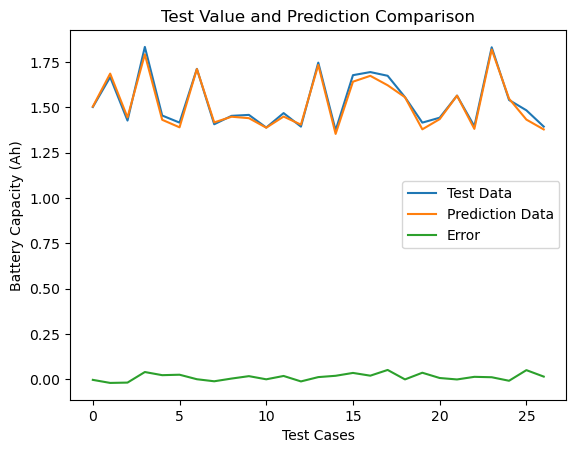

In [22]:
DFF.plot(use_index=True,legend=True,title="Test Value and Prediction Comparison", xlabel="Test Cases", ylabel="Battery Capacity (Ah)")
plt.show()

In [32]:
DFF.to_csv("C:\\Users\\sophi\\VS Code Projects\\LiB-SOH-prediction\\Nasa Battery Data\\Battery 5\\Predictions1.csv")

In [22]:
#Data plotting
df3 = pd.read_csv("C:\\Users\\sophi\\VS Code Projects\\LiB-SOH-prediction\\Nasa Battery Data\\Battery 5\\Discharge cycle\\Headers\\B0005 cycle 2 data with headers.csv")

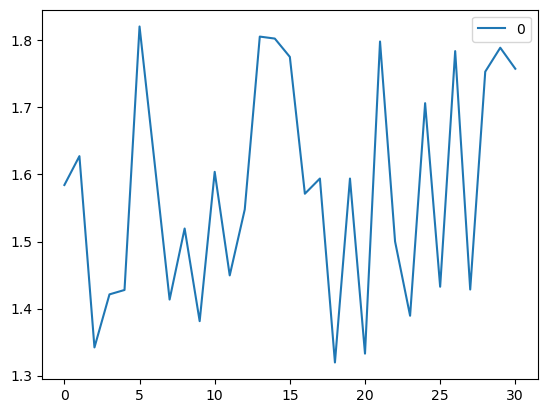

In [31]:
df3.reset_index(inplace=True, drop=True)
df4 = df3["Voltages"]
#df4.plot()
df6.plot()

plt.show()

In [ ]:
x_axis 
plt.scatter(y_test)
plt.xlabel('Time step')
plt.ylabel('Capacity')